# Explore covered physical phase space

In [4]:
import gammapy
gammapy.__version__

'0.18.2'

In [5]:
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import setup
from setup import col_n, col_s, col_b, dtpop
from pop_plot import col_size, sig_legend, history, plot_historical, redshift, eiso, epeak
import init as init

from utilities import MyLabel, single_legend, stamp, projected_scatter

plt.style.use('seaborn-talk') # Make the labels readable
#plt.style.use('seaborn-poster') # Make the labels readable - bug with normal x marker !!!

## Read data - create the total population - infer detection level

In [7]:
# Open data, get population
nyears, file = init.create_csv(debug=True)

(grb, gn0, gs0, gn, gs, gb) = init.get_data(file, debug=False)

# Effective det_level
eff_lvl = init.get_eff_lvl(grb)

import pandas as pd
fullpop = pd.concat([gn0,gs0,gb],axis=0)
len(fullpop)

filetag = file.parent.name

Full name : D:\CTAA\SoHAPPy\output\short\strictmoonveto\pop_vis24_strictmoonveto-100iter-noacc\data.txt
 >>>  D:\CTAA\SoHAPPy\output\short\strictmoonveto\pop_vis24_strictmoonveto-100iter-noacc\data.csv
D:\CTAA\SoHAPPy\output\short\strictmoonveto\pop_vis24_strictmoonveto-100iter-noacc\data.csv  exists


## Reference population

In [8]:
popref   = grb[grb.site=="North"] # Get initial population (restrict ot one of N, S, B)
popNS    = grb[(grb.site=="North") | (grb.site=="South")]
len(popNS)

2000

## Fraction of z population covered 

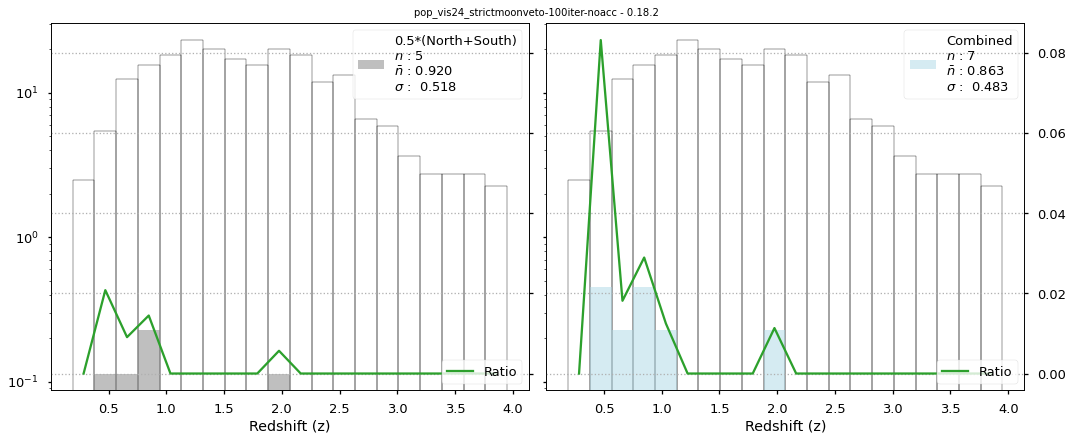

In [9]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6),sharey=True)
# Mean North and South
ax, axx1 = redshift(popNS,popref,ax=ax1,tag="0.5*(North+South)",det_level = eff_lvl, w=0.5,alpha=0.5)
axx1.set_yticklabels([])

# Combined North and South
ax, axx2 = redshift(fullpop,popref,ax=ax2,tag="Combined",det_level = eff_lvl, color="lightblue",alpha=0.5)

axx1.get_shared_y_axes().join(axx1,axx2)
stamp(filetag, axis=fig, where="top")
plt.tight_layout()

## Fraction of Eiso population covered 

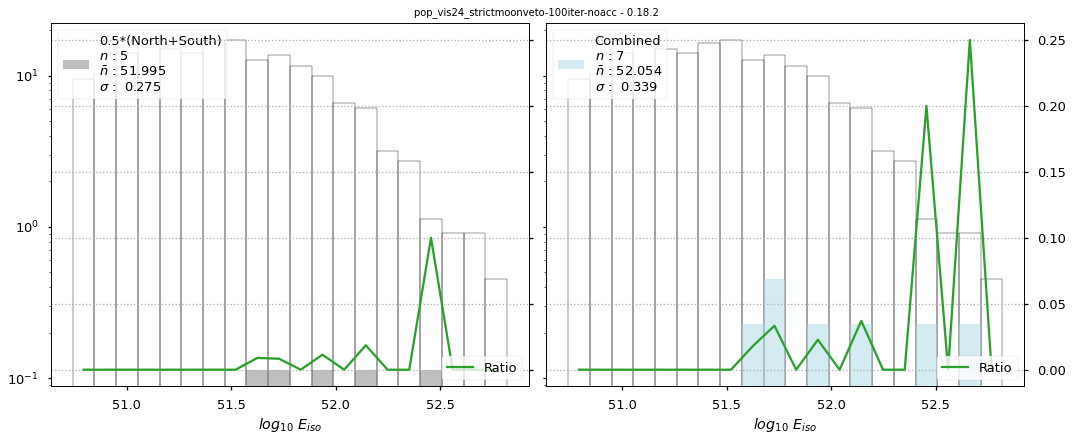

In [10]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6),sharey=True)
# Mean North and South
ax, axx1 = eiso(popNS,popref,ax=ax1,tag="0.5*(North+South)",det_level = eff_lvl, w=0.5,alpha=0.5)
axx1.set_yticklabels([])

# Combined NOrth and Sout
ax, axx2 = eiso(fullpop,popref,ax=ax2,tag="Combined",det_level = eff_lvl, color="lightblue",alpha=0.5)

axx1.get_shared_y_axes().join(axx1,axx2)
stamp(filetag, axis=fig, where="top")

plt.tight_layout()

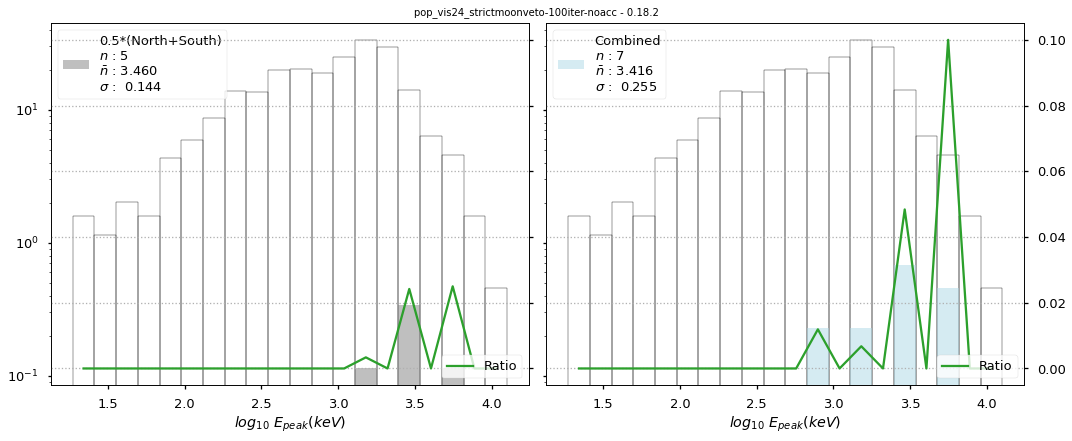

In [11]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6),sharey=True)
# Mean North and South
ax, axx1 = epeak(popNS,popref,ax=ax1,tag="0.5*(North+South)",det_level = eff_lvl, w=0.5,alpha=0.5)
axx1.set_yticklabels([])

# Combined North and Sout
ax, axx2 = epeak(fullpop,popref,ax=ax2,tag="Combined",det_level = eff_lvl, color="lightblue",alpha=0.5)

axx1.get_shared_y_axes().join(axx1,axx2)
stamp(filetag, axis=fig, where="top")

plt.tight_layout()

## Eiso versus z 

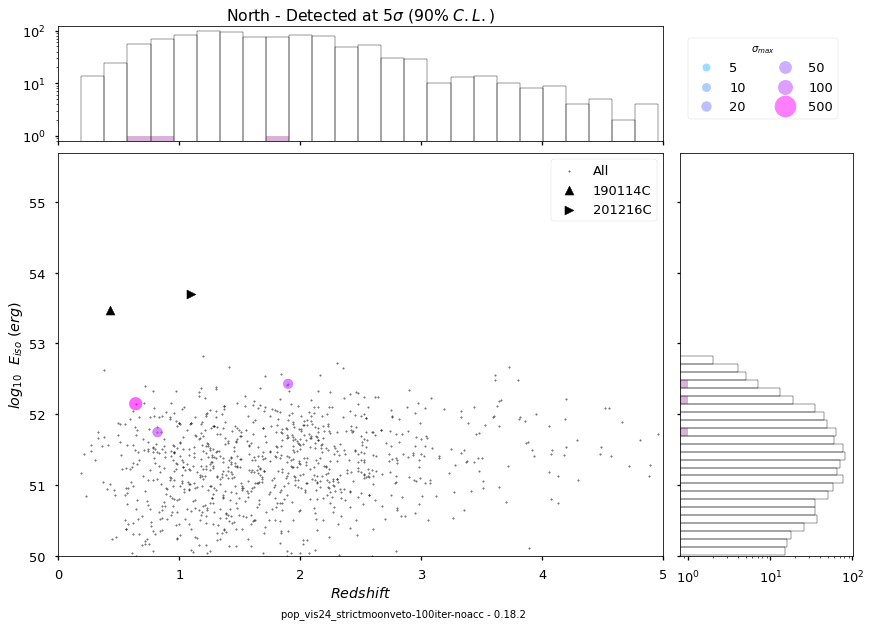

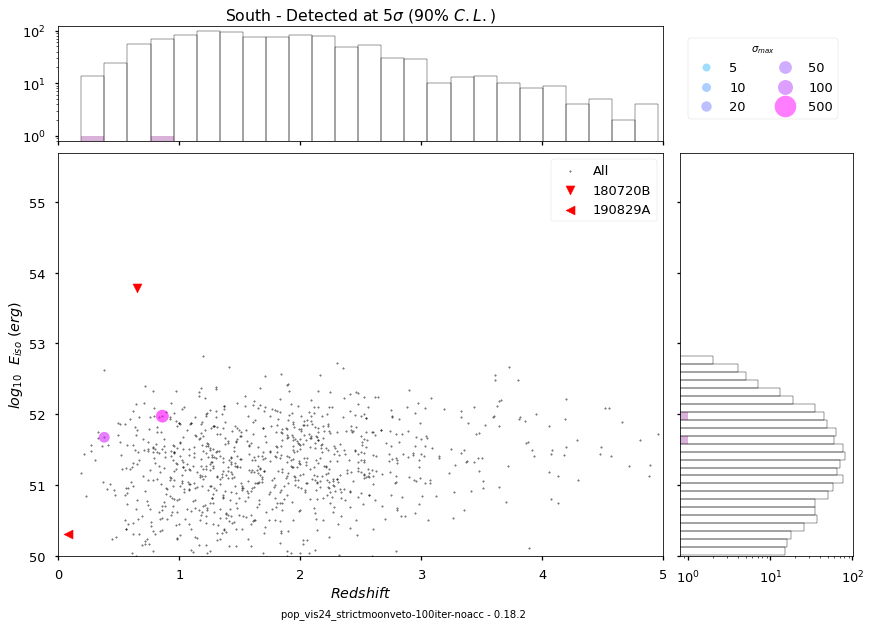

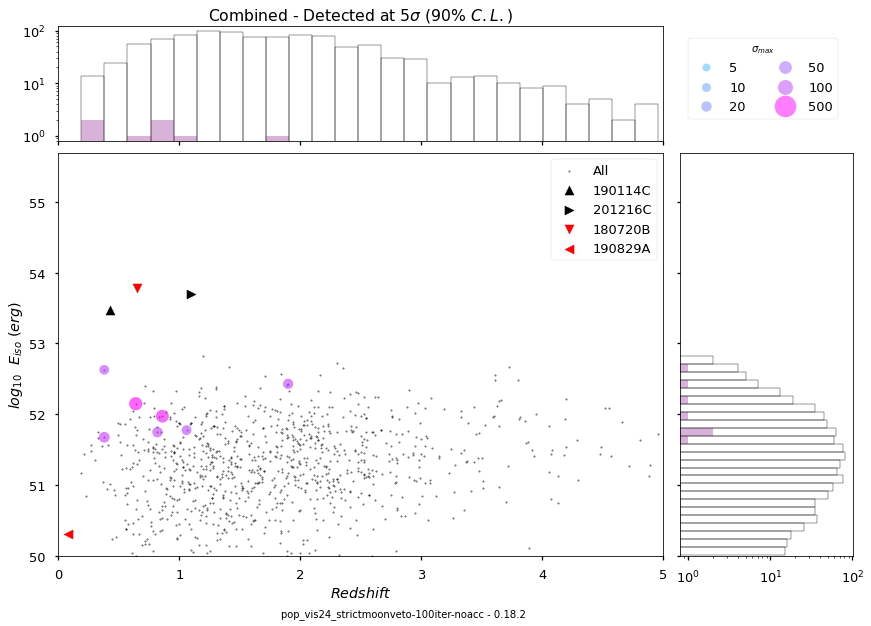

In [12]:
zlimit  = 7
Eisomin = 1e50
Eisomax = 5e55
zmin = 0
zmax = 5

### -----------------------
### Loop over population
### -----------------------
taglist  = ["North", "South", "Combined"]
# masklist = [gn.sigmx>=sigmin, gs.sigmx>=sigmin,fullpop.sigmx>=sigmin]
# title = "$\sigma_{max} \geq"+str(sigmin)+"$"
masklist = [gn.d5s>=eff_lvl, gs.d5s>=eff_lvl,fullpop.d5s>=eff_lvl]
title = "Detected at $5\sigma \ (90\% \ C.L.)$"
poplist  = [gn,gs,fullpop]

iplot = 0
for pop, mask, tag in zip(poplist, masklist, taglist):
    
    ### Defintions for the axis
    fig, ax, axh, axv = projected_scatter()
    
    ### --------------------
    ### Central scatter plot
    ### --------------------
    # Generated population
    ax.scatter(popref.z, np.log10(popref.Eiso),
               marker=".", color="black",s=10, alpha=0.5, label="All")

    # Detected population
    colors, sizes = col_size(pop[mask].sigmx)
    ax.scatter(pop[mask].z, np.log10(pop[mask].Eiso),
               marker="o", s= sizes, c=colors, alpha = 0.6)

    # Historical
    if tag=="North":
        plot_historical(ax, history,obs=["MAGIC"])
#         plot_historical(ax, history,obs=["Fermi/LAT","MAGIC"])
    elif tag=="South":
        plot_historical(ax, history,obs=["H.E.S.S."])
#         plot_historical(ax, history,obs=["Fermi/LAT","H.E.S.S."])
    else:
        plot_historical(ax, history,obs=["H.E.S.S.","MAGIC"])
#         plot_historical(ax, history,obs=["Fermi/LAT","H.E.S.S.","MAGIC"])
    
    # Decoration
    ax.set_xlim(xmin=zmin, xmax=zmax)
    ax.set_xlabel("$Redshift$")

    ax.set_ylim(ymin=np.log10(Eisomin),ymax=np.log10(Eisomax))
    ax.set_ylabel("$log_{10}$  $E_{iso}$ $(erg)$")

    
    patches = sig_legend(ax)
    fig.legend(title="$\sigma_{max}$",handles=patches, bbox_to_anchor=[1.01, 1.01],ncol=2)
    
    single_legend(ax)

    stamp(filetag, axis=fig, where="bottom")

    ### --------------------
    ### Eiso - Vertical data
    ### --------------------    
    nbin = 25
    hist_mask = (popref.Eiso >= Eisomin) & (popref.Eiso <= Eisomax)

    n, bins, _ = axv.hist(np.log10(popref[hist_mask].Eiso),bins = nbin, 
                          facecolor="none",edgecolor="black",orientation="horizontal",
                          label=MyLabel( np.log10(popref[hist_mask].Eiso) ,label="All"))
    axv.hist(np.log10(pop[mask].Eiso),bins = bins,
             color="purple",alpha=0.3,orientation="horizontal",
             label = MyLabel( np.log10(pop[mask].Eiso) ,label="Detected"))
    axv.set_xscale("log")
#     axv.legend()

    
    ### --------------------
    ### z - horizontal data
    ### --------------------    
    nbin = 25
    hist_mask = (popref.z >= zmin) & (popref.z <= zmax)

    n, bins, _ = axh.hist(popref[hist_mask].z, bins = nbin, facecolor="none",edgecolor="black")
    axh.hist(pop[mask].z, bins = bins,
            color="purple",alpha=0.3)
    
    axh.set_xlim(xmin = zmin, xmax=zmax)
    axh.set_title(tag+" - " + title)
    axh.set_yscale("log")


# Eiso versus Epeak

In [ ]:
Eisomin = 1e50
Eisomax = 5e55
Epeakmin = 10
Epeakmax = 30000

### -----------------------
### Loop over population
### -----------------------
taglist  = ["North", "South", "Combined"]
# masklist = [gn.sigmx>=sigmin, gs.sigmx>=sigmin,fullpop.sigmx>=sigmin]
# title = "$\sigma_{max} \geq"+str(sigmin)+"$"
masklist = [gn.d5s>=eff_lvl, gs.d5s>=eff_lvl,fullpop.d5s>=eff_lvl]
title = "Detected at $5\sigma \ (90\% \ C.L.)$"
poplist  = [gn,gs,fullpop]

iplot = 0
for pop, mask, tag in zip(poplist, masklist, taglist):
    
    ### Defintions for the axis
    fig, ax, axh, axv = projected_scatter()
    
    ### --------------------
    ### Central scatter plot
    ### --------------------
    # Generated population
    ax.scatter(np.log10(popref.Epeak), np.log10(popref.Eiso),
               marker=".", color="black",s=10, alpha=0.5, label="All")

    # Detected population
    colors, sizes = col_size(pop[mask].sigmx)
    ax.scatter(np.log10(pop[mask].Epeak), np.log10(pop[mask].Eiso),
               marker="o", s= sizes, c=colors, alpha = 0.6)
    
    # Decoration
    ax.set_xlim(xmin=np.log10(Epeakmin), xmax=np.log10(Epeakmax))
    ax.set_xlabel("$log_{10}$  $E_{peak}$ $(keV)$")

    ax.set_ylim(ymin=np.log10(Eisomin),ymax=np.log10(Eisomax))
    ax.set_ylabel("$log_{10}$  $E_{iso}$ $(erg)$")
    ax.grid("both",ls="--")
    
    patches = sig_legend(ax)
    fig.legend(title="$\sigma_{max}$",handles=patches, bbox_to_anchor=[1.04, 1.01],ncol=2)
    
    single_legend(ax)

    ### --------------------
    ### Eiso - Vertical data
    ### --------------------    
    nbin = 25
    hist_mask = (popref.Eiso >= Eisomin) & (popref.Eiso <= Eisomax)

    n, bins, _ = axv.hist(np.log10(popref[hist_mask].Eiso),bins = nbin, 
                          facecolor="none",edgecolor="black",orientation="horizontal",
                          label=MyLabel( np.log10(popref[hist_mask].Eiso) ,label="All"))
    axv.hist(np.log10(pop[mask].Eiso),bins = bins,
             color="purple",alpha=0.3,orientation="horizontal",
             label = MyLabel( np.log10(pop[mask].Eiso) ,label="Detected"))
    axv.set_xscale("log")
#     axv.legend()

    
    ### --------------------
    ### z - horizontal data
    ### --------------------    
    nbin = 25
    hist_mask = (popref.Epeak >= Epeakmin) & (popref.Epeak <= Epeakmax)

    n, bins, _ = axh.hist(np.log10(popref[hist_mask].Epeak), bins = nbin, facecolor="none",edgecolor="black")
    axh.hist(np.log10(pop[mask].Epeak), bins = bins,
            color="purple",alpha=0.3)
    
    axh.set_xlim(xmin = np.log10(Epeakmin), xmax=np.log10(Epeakmax))
    axh.set_title(tag+" - " + title)
    axh.set_yscale("log")

    stamp(filetag, axis=fig, x=1.04, y = 0.5, rotation=270)
